In [1]:
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/archive (5) (1)/data/"

In [6]:
for i in os.listdir(path):
  print(i,len(os.listdir(path+i)))

water 1500
desert 1131
cloudy 1501
green_area 1500


In [7]:
import keras
import keras.utils as image
import matplotlib.pyplot as plt

In [8]:
img=image.load_img(path+'cloudy/'+'train_10021.jpg')

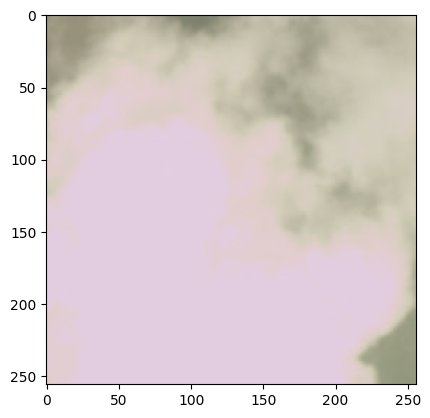

In [9]:
plt.imshow(img)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_X=ImageDataGenerator(
    rescale=1/255, #multiplies each data with 1/255 to normalize
    rotation_range=20, #tilting image by 20 degree (Data Augumentation refers to changing the input slightly by tilting,shear,rotating etc. Data augumentation is mostly used when
                      #there is lack of train data and hence we train each image with a new perspective to increase the features)
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True
)

In [12]:
train_gen=train_X.flow_from_directory(path,
                                      target_size=(250,250),
                                      batch_size=30,
                                      class_mode='categorical', # to tell which class the input belongs to
                                      )

Found 5632 images belonging to 4 classes.


In [13]:
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAvgPool2D

In [14]:
resnet_model=ResNet50(weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [15]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [16]:
for layer in resnet_model.layers:
  layer.trainable=True

In [17]:
model_output=resnet_model.output
model_output=GlobalAvgPool2D()(model_output)
model_output=Dense(1024,activation='relu')(model_output)
model_output=Dense(4,activation='softmax')(model_output)

In [18]:
model=Model(inputs=resnet_model.input,outputs=model_output)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [20]:
adam=keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [21]:
hist=model.fit(train_gen,epochs=10)

Epoch 1/10
188/188 [==============================] - 1780s 9s/step - loss: 0.3798 - accuracy: 0.9039 - precision: 0.9165 - recall: 0.8910
Epoch 2/10
188/188 [==============================] - 127s 672ms/step - loss: 0.1554 - accuracy: 0.9522 - precision: 0.9533 - recall: 0.9506
Epoch 3/10
188/188 [==============================] - 125s 666ms/step - loss: 0.0832 - accuracy: 0.9755 - precision: 0.9763 - recall: 0.9741
Epoch 4/10
188/188 [==============================] - 126s 671ms/step - loss: 0.0758 - accuracy: 0.9803 - precision: 0.9805 - recall: 0.9801
Epoch 5/10
188/188 [==============================] - 127s 673ms/step - loss: 0.0634 - accuracy: 0.9812 - precision: 0.9817 - recall: 0.9806
Epoch 6/10
188/188 [==============================] - 125s 665ms/step - loss: 0.0553 - accuracy: 0.9822 - precision: 0.9831 - recall: 0.9821
Epoch 7/10
188/188 [==============================] - 127s 672ms/step - loss: 0.0360 - accuracy: 0.9877 - precision: 0.9884 - recall: 0.9870
Epoch 8/10
188/